In [111]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [112]:
df = pd.read_csv(r"C:\Users\dines\OneDrive\Desktop\projects\practice\fake real news\fake_or_real_news.csv")
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [113]:
df.shape

(6335, 4)

In [114]:
df['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [115]:
df['label_num']=LabelEncoder().fit_transform(df['label'])
df.head()

,Unnamed: 0,title,text,label,label_num
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1


In [116]:
df = df.drop(['label','Unnamed: 0'], axis=1)
df.head()

,title,text,label_num
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label_num'], test_size=0.2, random_state=2022,stratify=df['label_num'])

In [119]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [120]:
obj = Pipeline([('vectorizer',CountVectorizer(ngram_range=(1,2))), ('model', MultinomialNB(alpha=0.75))])
obj.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(1, 2))),
                ('model', MultinomialNB(alpha=0.75))])

In [121]:
y_pred = obj.predict(X_test)

In [122]:
from sklearn.metrics import classification_report

In [123]:
rep = classification_report(y_test, y_pred)
print(rep)

              precision    recall  f1-score   support

           0       0.97      0.82      0.89       633
           1       0.85      0.97      0.91       634

    accuracy                           0.90      1267
   macro avg       0.91      0.90      0.90      1267
weighted avg       0.91      0.90      0.90      1267



In [124]:
from sklearn.neighbors import KNeighborsClassifier

In [125]:
obj = Pipeline([('vectorizer',CountVectorizer(ngram_range=(1,3))), ('model',KNeighborsClassifier(n_neighbors=10,metric='euclidean') )])
obj.fit(X_train, y_train)
y_pred = obj.predict(X_test)
rep = classification_report(y_test, y_pred)
print(rep)

              precision    recall  f1-score   support

           0       0.66      0.80      0.72       633
           1       0.75      0.58      0.66       634

    accuracy                           0.69      1267
   macro avg       0.70      0.69      0.69      1267
weighted avg       0.70      0.69      0.69      1267



In [126]:
obj = Pipeline([('vectorizer',CountVectorizer(ngram_range=(1,3))), ('model',KNeighborsClassifier(n_neighbors=10,metric='cosine') )])
obj.fit(X_train, y_train)
y_pred = obj.predict(X_test)
rep = classification_report(y_test, y_pred)
print(rep)

              precision    recall  f1-score   support

           0       0.74      0.75      0.74       633
           1       0.75      0.73      0.74       634

    accuracy                           0.74      1267
   macro avg       0.74      0.74      0.74      1267
weighted avg       0.74      0.74      0.74      1267



In [127]:
from sklearn.ensemble import RandomForestClassifier


In [128]:
obj = Pipeline([('vectorizer',CountVectorizer(ngram_range=(3,3))), ('model',RandomForestClassifier(n_estimators=20) )])
obj.fit(X_train, y_train)
y_pred = obj.predict(X_test)
rep = classification_report(y_test, y_pred)
print(rep)

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       633
           1       0.91      0.76      0.83       634

    accuracy                           0.85      1267
   macro avg       0.85      0.85      0.84      1267
weighted avg       0.85      0.85      0.84      1267



In [129]:
from nltk.corpus import stopwords
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [130]:
ps = PorterStemmer()
stop_words = stopwords.words('english')
punctuation = list(punctuation)

In [131]:
def preprocess(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = []
    for token in tokens:
        if token in stop_words or token in punctuation:
            continue
        filtered_tokens.append(ps.stem(token))
    
    return " ".join(filtered_tokens) 

In [132]:
preprocess_sent = [preprocess(sent) for sent in df['text']]

In [133]:
df['preprocessed_text'] = preprocess_sent

In [134]:
df.head()

,title,text,label_num,preprocessed_text
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0,daniel greenfield shillman journal fellow free...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0,googl pinterest digg linkedin reddit stumbleup...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1,u.s. secretari state john f. kerri said monday...
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0,— kayde king kaydeek novemb 9 2016 lesson toni...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1,'s primari day new york front-runn hillari cli...


In [135]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df['preprocessed_text'], df['label_num'], test_size=0.2, random_state=2022,stratify=df['label_num'])

In [136]:
obj = Pipeline([('vectorizer',CountVectorizer(ngram_range=(3,3))), ('model',RandomForestClassifier(n_estimators=20) )])
obj.fit(X_train1, y_train1)
y_pred = obj.predict(X_test1)
rep = classification_report(y_test1, y_pred)
print(rep)

              precision    recall  f1-score   support

           0       0.72      0.98      0.83       633
           1       0.98      0.62      0.76       634

    accuracy                           0.80      1267
   macro avg       0.85      0.80      0.80      1267
weighted avg       0.85      0.80      0.80      1267



In [137]:
obj = Pipeline([('vectorizer',CountVectorizer(ngram_range=(1,3))), ('model',RandomForestClassifier(n_estimators=20) )])
obj.fit(X_train1, y_train1)
y_pred = obj.predict(X_test1)
rep = classification_report(y_test1, y_pred)
print(rep)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       633
           1       0.88      0.81      0.85       634

    accuracy                           0.85      1267
   macro avg       0.86      0.85      0.85      1267
weighted avg       0.86      0.85      0.85      1267



In [139]:
obj = Pipeline([('vectorizer',CountVectorizer(ngram_range=(1,2))), ('model', MultinomialNB(alpha=0.75))])
obj.fit(X_train1, y_train1)
y_pred = obj.predict(X_test1)
rep = classification_report(y_test1, y_pred)
print(rep)

              precision    recall  f1-score   support

           0       0.98      0.83      0.90       633
           1       0.85      0.98      0.91       634

    accuracy                           0.91      1267
   macro avg       0.92      0.91      0.91      1267
weighted avg       0.92      0.91      0.91      1267



In [138]:
from sklearn.metrics import confusion_matrix


In [140]:
cm = confusion_matrix(y_test1, y_pred)
cm

array([[526, 107],
       [ 12, 622]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

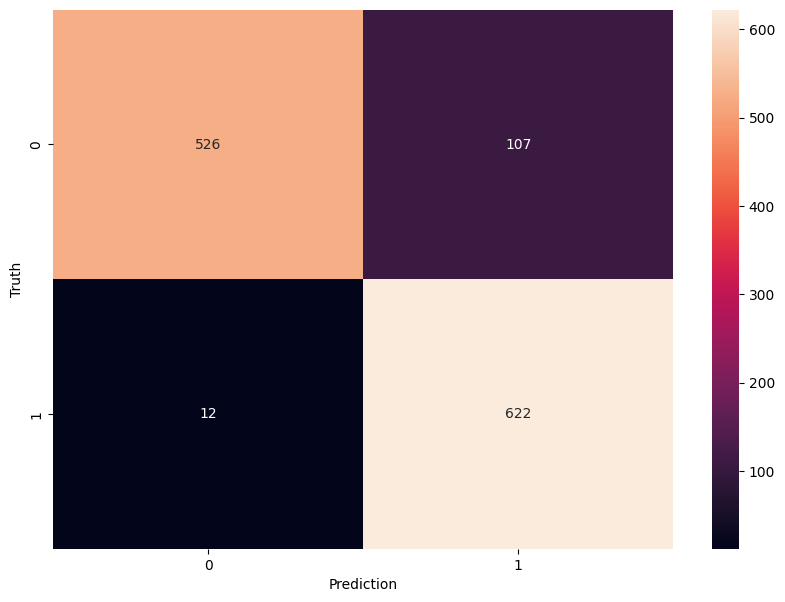

In [141]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')